In [22]:
import hisepy
import os
import pandas as pd
import scanpy as sc

In [14]:
def read_adata_uuid(h5ad_uuid):
    h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)
    if not os.path.isdir(h5ad_path):
        hise_res = hisepy.reader.cache_files([h5ad_uuid])
    h5ad_filename = os.listdir(h5ad_path)[0]
    h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)
    adata = sc.read_h5ad(h5ad_file)
    return adata

In [15]:
def read_parquet_uuid(pq_uuid):
    pq_path = '/home/jupyter/cache/{u}'.format(u = pq_uuid)
    if not os.path.isdir(pq_path):
        hise_res = hisepy.reader.cache_files([pq_uuid])
    pq_filename = os.listdir(pq_path)[0]
    pq_file = '{p}/{f}'.format(p = pq_path, f = pq_filename)
    df = pd.read_parquet(pq_file)
    return df

## Read subclustering and barcode annotations from HISE

In [16]:
cell_class = 'b-cells'

In [17]:
h5ad_uuid = '99f83994-26ee-49af-a882-c1f2558daed2'

In [18]:
adata = read_adata_uuid(h5ad_uuid)

In [19]:
anno_uuid = '0c87552f-d155-4b95-9a87-c3682b206f6c'

In [23]:
anno = read_parquet_uuid(anno_uuid)

## Add annotations to barcodes

In [24]:
obs = adata.obs
obs = obs.reset_index(drop = True)
obs = obs.merge(anno, on = 'barcodes', how = 'left')
obs = obs.set_index('barcodes', drop = False)

In [25]:
adata.obs = obs

## Drop doublet/contamination labels

In [36]:
exclude_terms = [
    'Contamination', 'contamination',
    'Doublet', 'doublet',
    'Mito', 'mito'
]

In [37]:
all_types = adata.obs['AIFI_L3'].unique().tolist()

In [38]:
exclude_types = []
for cell_type in all_types:
    for term in exclude_terms:
        if term in cell_type:
            exclude_types.append(cell_type)

In [39]:
exclude_types

['T_B doublet',
 'NK_Mono doublet',
 'B_mono doublet',
 'B_platelet doublet',
 'Erythrocyte contamination']

In [40]:
keep_types = []
for cell_type in all_types:
    if not cell_type in exclude_types:
        keep_types.append(cell_type)

In [41]:
adata = adata[adata.obs['AIFI_L3'].isin(keep_types)]
adata.shape

(160632, 1209)

## Plot L2 marker expression

In [62]:
l2_markers = [
    'AIM2', 'CD24', 'CD27', 'CD83', 'CD44',
    'CD9', 'IGHD', 'ITGAX', 'MEF2C', 'MME', 
    'MZB1', 'PRDM1', 'TBX21', 'XBP1'
]

Set L2 category order

In [63]:
category_order = [
    'Plasma cell',
    'Effector B cell', 
    'Memory B cell', 
    'Naive B cell',
    'Transitional B cell',
]

adata.obs['AIFI_L2'] = (
    adata.obs['AIFI_L2']
    .cat
    .set_categories(category_order, ordered=True)
)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


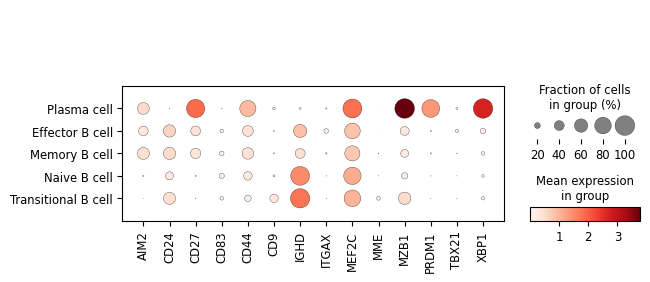

In [64]:
sc.pl.dotplot(
    adata,
    groupby = 'AIFI_L2',
    var_names = l2_markers,
    log = True
)

## Plot L3 marker expression

In [59]:
l3_markers = [
    'AIM2', 'CD27', 'CD69', 'CD79B', 'COCH',
    'FAS', 'FCER2', 'FCGR2B', 'FOS', 'IFI44L',
    'IGHD', 'IGHE', 'IGHM', 'IL4R', 'ISG15',
    'ITGAX', 'JUN', 'MEF2C', 'MYC', 'STAT1'
]

Set L3 category order

In [60]:
category_order = [
    'Plasma cell',
    'Transitional B cell',
    'Core naive B cell',
    'ISG+ naive B cell',
    'CD95 memory B cell',
    'Core memory B cell',
    'Type 2 polarized memory B cell',
    'CD27- effector B cell',
    'Activated memory B cell',
    'CD27+ effector B cell',
    'Early memory B cell'
]

adata.obs['AIFI_L3'] = (
    adata.obs['AIFI_L3']
    .cat
    .set_categories(category_order, ordered=True)
)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


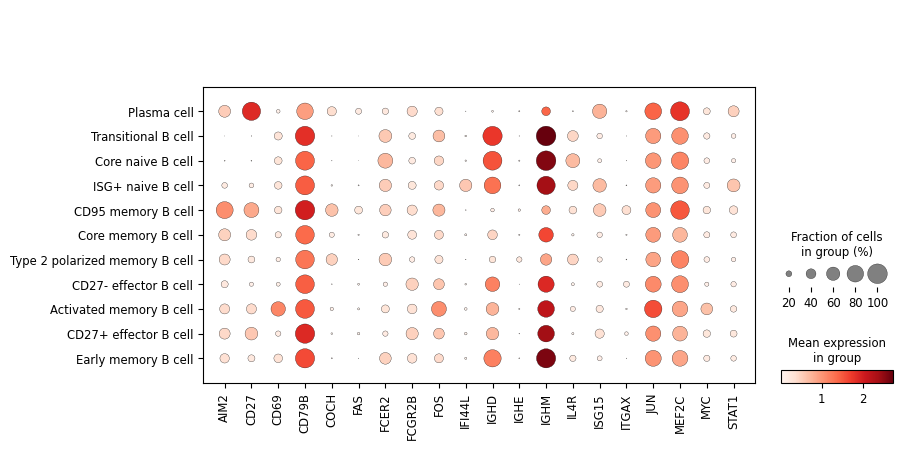

In [61]:
sc.pl.dotplot(
    adata,
    groupby = 'AIFI_L3',
    var_names = l3_markers,
    log = True
)

In [67]:
import session_info
session_info.show()